In [1]:
import pickle
from jupyter_utils import jupyter_setup
jupyter_setup()
import numpy as np
import pandas as pd
from audio_processing import FeatureSet
import matplotlib.pyplot as plt
import librosa
import ipywidgets as widgets
import os
dataset_basepath = "data/Coswara_processed/pickles/"
from participant import Participant
from tqdm.notebook import tqdm

C:\Michi\acoustic_covid_detection\python


In [2]:
dataset_list = os.listdir(dataset_basepath)
# dataset_list = [dataset for dataset in dataset_list if "logmel_combined_breath" in dataset and "augmented" not in dataset]

def load_dataset(path):
    dataset_basepath = "data/Coswara_processed/pickles/"
    fullpath = os.path.join(dataset_basepath, path)
    print(fullpath)
    with open(fullpath, "rb") as f:
        return pickle.load(f)
    
dropdown = widgets.Dropdown(options=dataset_list)
# dropdown.observe(print_name, names="values")
display(dropdown)

Dropdown(options=('2022-12-08-logmel_1_channel_augmented_noBadAudio.pickle', '2022-12-08-logmel_1_channel_noAu…

In [4]:
dataset = load_dataset(dropdown.value)
print(dataset)

data/Coswara_processed/pickles/2023_06_25_logmel_combined_vowels_NEW_23msHop_96msFFT_fmax11000_224logmel.pickle

Feature Set - #Participants: 1770
----------------------------------------------------
type_of_features:    logmel
n_time_steps:        224
n_features:          224
sample_rate:         22050
n_fft:               8192
window_length:       2048
hop_size:            512
fmin:                0
fmax:                11025
hop_size_ms:         23.22
window_length_ms:    92.88
duration_seconds:    5.2
fft_res_hz:          2.69
-------------------Augmentations--------------------
----------------------------------------------------


(0.0, 45.0)

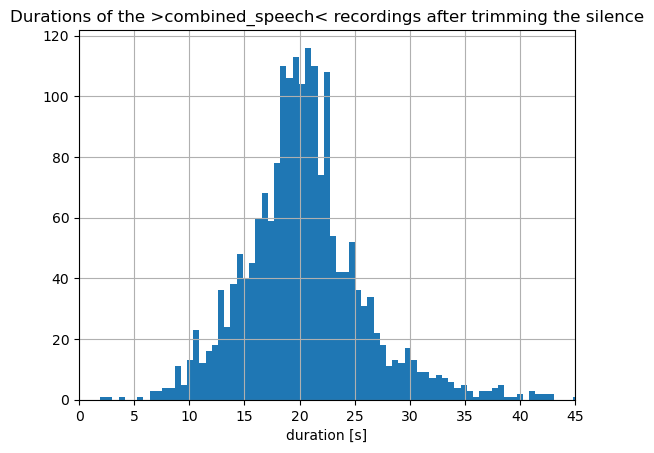

In [465]:
# plot the distribution of the durations of the recordings in the dataset
durations = [p.recordings[dataset.types_of_recording].original_duration_trimmed_silence for p in dataset.participants]
plt.hist(durations, 100), plt.title(f"Durations of the >{dataset.types_of_recording}< recordings after trimming the silence")
plt.grid(), plt.xlabel("duration [s]")
plt.xlim([0, 45])

# calculate the max amplitude/mean/var of each recording 

In [ ]:
amplitude_dict = {}
error_ids = []
for participant in tqdm(dataset.participants):
    try:
        rec = participant.recordings[dataset.types_of_recording].get_audio()[0]
        max_amplitude = np.mean(np.abs(rec))
        amplitude_dict[participant.id] = max_amplitude
    except ValueError:
        amplitude_dict[participant.id] = 0
        error_ids.append(participant.id)

(0.0, 0.3)

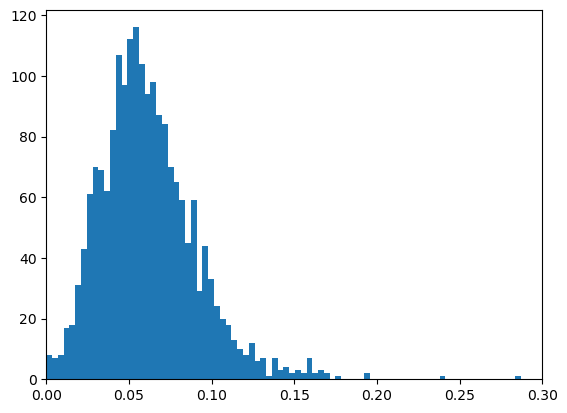

In [467]:
amplitudes = [val for key, val in amplitude_dict.items()]
plt.hist(amplitudes, 100)
plt.xlim([0, 0.3])

# Find recordings with a max amplitude below a given threshold (find silent samples e.g.)

In [500]:
threshold = 0.02
bad_amplitudes = [(i, participant_id, val) for i, (participant_id, val) in enumerate(amplitude_dict.items()) if val < threshold]

In [501]:
counter = 0
a = [int(idx) for idx, _,_ in bad_amplitudes]
np.array(a)

array([  39,   51,   71,   80,   98,  212,  290,  327,  347,  376,  413,
        414,  437,  492,  498,  578,  646,  672,  674,  747,  755,  764,
        792,  795,  798,  810,  833,  844,  877,  878,  914,  922,  968,
        998, 1009, 1021, 1030, 1039, 1040, 1076, 1095, 1150, 1162, 1173,
       1179, 1202, 1216, 1221, 1240, 1247, 1303, 1328, 1359, 1398, 1434,
       1458, 1468, 1478, 1487, 1502, 1518, 1533, 1538, 1549, 1552, 1574,
       1588, 1593, 1632, 1647, 1649, 1670, 1691, 1699, 1705, 1716, 1731,
       1880])

1247
Duration of the Recording: 27.1
Okal6T0guFZi4Slm4k4MEyuCnyv1


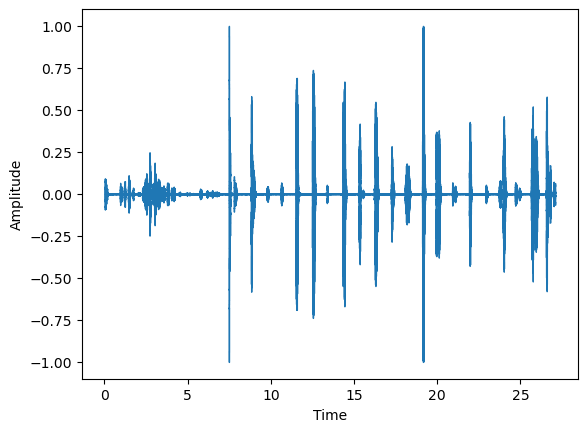

In [553]:
idx = a[counter]
counter += 1
# idx = np.random.randint(1900)
print(idx)
participant = dataset.participants[idx].recordings[dataset.types_of_recording]
participant.show_waveform(30)    
# participant.play_audio()    
# participant.show_features()
user_id = dataset.participants[idx].id
print(user_id)
# relevant_df[relevant_df["user_id"] == user_id]

In [519]:
participant.play_audio(30)    

Duration of the Recording: 31.55


In [ ]:
bad_amplitudes

# Find recordings with a duration below a given threshold

In [6]:
durations = []
duration_thresh = 10  # seconds
for idx, participant in enumerate(dataset.participants):
    rec = participant.recordings[dataset.types_of_recording]
    duration = rec.original_duration_trimmed_silence
    if duration < duration_thresh:
        durations.append(idx)
counter = 0
print(durations)

[52, 64, 277, 324, 351, 406, 445, 481, 680, 708, 718, 747, 842, 861, 930, 1015, 1132, 1200, 1234, 1241, 1255, 1258, 1314, 1319, 1389, 1401, 1416, 1419, 1449, 1478, 1498, 1541, 1553, 1716, 1757, 1772, 1794, 1900, 1907]


324
Duration of the Recording: 9.13
9qTEkN9zyqc9zYKt4qpsgatdTLo2


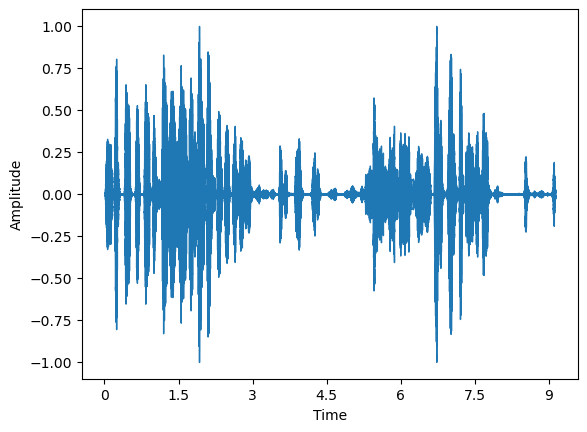

In [12]:
idx = durations[counter]
counter += 1
print(idx)
participant = dataset.participants[idx].recordings[dataset.types_of_recording]
participant.show_waveform(30)    
user_id = dataset.participants[idx].id
print(user_id)

In [13]:
participant.play_audio(30)    

Duration of the Recording: 9.13


In [ ]:
idx = np.random.randint(1900)
print(idx)
participant = dataset.participants[idx].recordings[dataset.types_of_recording]

# Some tests regarding audio qulaity measures

In [ ]:
target_length = 3000    # in miliseconds
offset = 0              # look at the spectrogram starting at "offset" miliseconds until offset+target_length miliseconds
f = (0, 123456)       # min and max frequency to display

hopsize_ms = participant.hop_size/participant.target_sr*1000
offset_frames = int(offset // hopsize_ms)
n_frames = int(target_length // hopsize_ms)
features = participant.features
features = features[:, offset_frames:n_frames+offset_frames]
mel_frequencies = librosa.mel_frequencies(n_mels=participant.n_features, htk=True, fmin=participant.fmin, fmax=participant.fmax)
f_idx = np.logical_and(mel_frequencies > f[0], mel_frequencies < f[1])
mel_frequencies = mel_frequencies[f_idx]
features = features[f_idx]

print(features.shape)
# print(np.round(mel_frequencies))

# plt.figure()
plt.figure(figsize=(15, 9))
librosa.display.specshow(features, x_axis='time', y_axis="log", cmap="magma",
                         hop_length=participant.hop_size, sr=participant.target_sr, y_coords=mel_frequencies)
plt.colorbar(format="%+2.f dB")
plt.title(dropdown.value)

In [ ]:
recording_type = "combined_coughs"
df = pd.read_csv("data/Coswara_processed/full_meta_data.csv")
bad_id_df = list(pd.read_excel(r"data/Coswara_processed/bad ids from listening and analysis.xlsx", sheet_name=recording_type, usecols=["ID"]).ID)
low_audio_quality_ids = list(df[(df["audio_quality_breathing-shallow"] == 0) | (df["audio_quality_breathing-deep"] == 0)]["user_id"])
all_bad_ids = bad_id_df+low_audio_quality_ids

In [ ]:
len(dataset)

In [ ]:
dataset.participants = [part for part in dataset.participants if part.id not in all_bad_ids]

In [ ]:
len(dataset)

In [ ]:
low_audio_quality = list(df[(df["audio_quality_breathing-shallow"] == 0) | (df["audio_quality_breathing-deep"] == 0)]["user_id"])

In [ ]:
len(set(low_audio_quality_ids +  bad_id_df))

In [ ]:
df.info()